In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

songs=pd.read_csv("songdata.csv")
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
songs.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [ ]:
songs.dropna(inplace=True)
songs.drop_duplicates(inplace=True)
songs['text'] = songs['text'].str.lower()

In [ ]:
songs=songs.sample(n=3000)
songs = songs.drop('link', axis=1)
songs=songs.reset_index(drop=True)

In [ ]:
col = songs['text']
col=col.str.replace(r'\n', '')
songs['text'] = col

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
matrix = tfidf.fit_transform(songs['text'])
print(matrix)

  (0, 15268)	0.29965776966586166
  (0, 235)	0.08315522879417638
  (0, 11481)	0.09455126579077143
  (0, 907)	0.1851579759486323
  (0, 5540)	0.07073721131759099
  (0, 13248)	0.10623159912027459
  (0, 13430)	0.13057246822177934
  (0, 16911)	0.16567743168233284
  (0, 12945)	0.05536441152006052
  (0, 4723)	0.10360407944673315
  (0, 9584)	0.06011616518957112
  (0, 16861)	0.05295100226196436
  (0, 5600)	0.09257898797431614
  (0, 2149)	0.08475656108645363
  (0, 1695)	0.056170313228467966
  (0, 7421)	0.056379480594671676
  (0, 9317)	0.06475068572541808
  (0, 14683)	0.12285169087761025
  (0, 2561)	0.09418032026659338
  (0, 13964)	0.09809153371052465
  (0, 5048)	0.10360407944673315
  (0, 5680)	0.1130278386268729
  (0, 12910)	0.2427309237758952
  (0, 12292)	0.23619718264029058
  (0, 10884)	0.1130278386268729
  :	:
  (2999, 8891)	0.2938052053482578
  (2999, 8979)	0.23652579551327851
  (2999, 3169)	0.13352707457953322
  (2999, 2146)	0.10150989257983348
  (2999, 2779)	0.11679511771260653
  (2999, 276

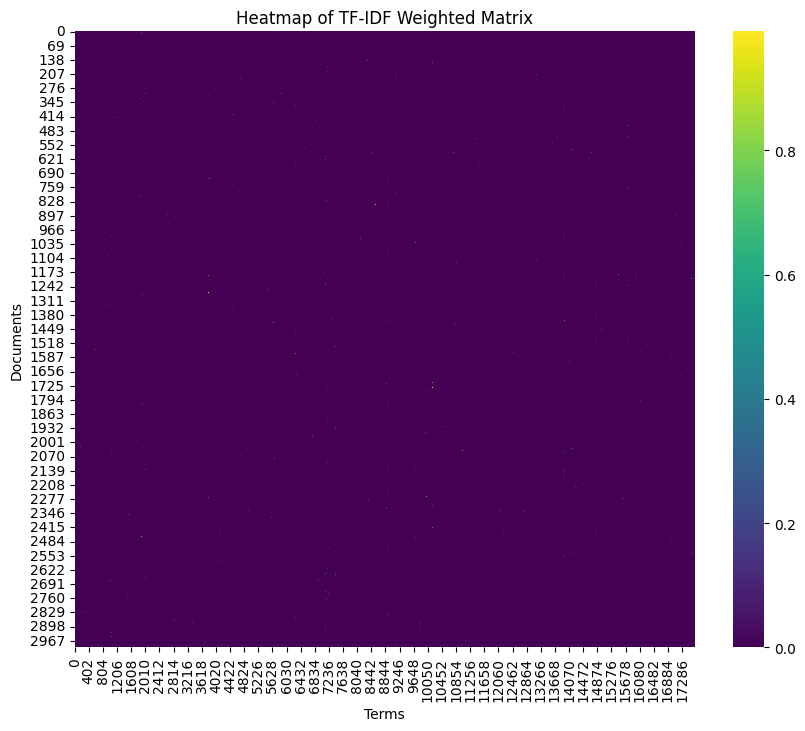

In [ ]:
matrix_array = matrix.toarray()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_array, cmap='viridis')
plt.title('Heatmap of TF-IDF Weighted Matrix')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()

In [ ]:
cosineSim = cosine_similarity(matrix)
similar = {}

for i in range(len(cosineSim)):
    similarIndex = cosineSim[i].argsort()[:-50:-1]
    similarItems = []
    for x in similarIndex:
        if x != i:
            similarItems.append((cosineSim[i][x], songs['song'][x], songs['artist'][x]))

    similar[songs['song'].iloc[i]] = similarItems

print(cosineSim)

[[1.         0.00926527 0.02250236 ... 0.         0.01621284 0.016318  ]
 [0.00926527 1.         0.         ... 0.00965246 0.01455308 0.00499119]
 [0.02250236 0.         1.         ... 0.00690905 0.01757441 0.01781806]
 ...
 [0.         0.00965246 0.00690905 ... 1.         0.00713009 0.0086462 ]
 [0.01621284 0.01455308 0.01757441 ... 0.00713009 1.         0.00833907]
 [0.016318   0.00499119 0.01781806 ... 0.0086462  0.00833907 1.        ]]


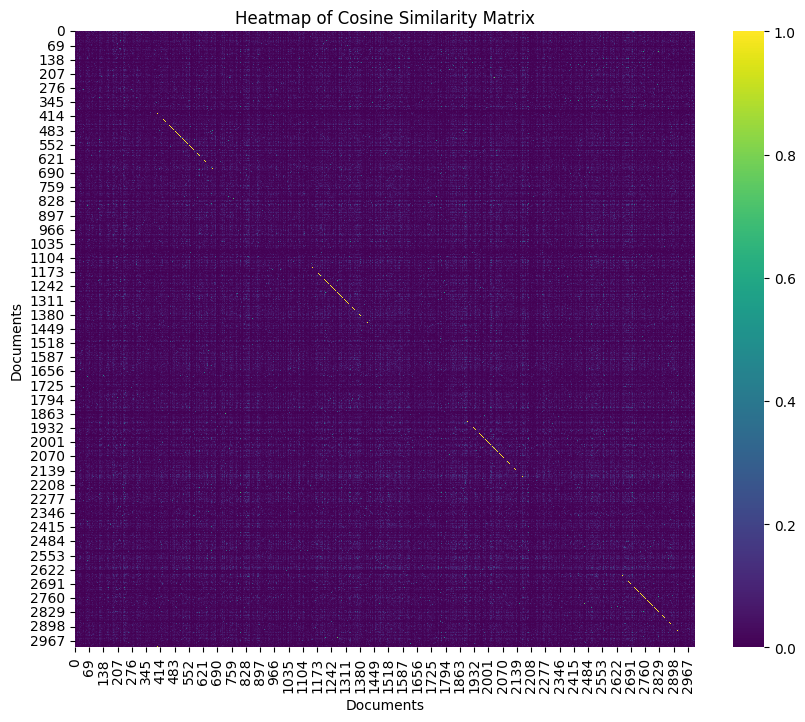

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosineSim, cmap='viridis')
plt.title('Heatmap of Cosine Similarity Matrix')
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.show()

In [ ]:
def recommendedSongs(song, recom_song):
    rec_items = len(recom_song)

    print(f'The {rec_items} recommended songs for {song} are:')
    for i in range(rec_items):
        print(f"Number {i+1}:")
        print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score")
        print("--------------------")

def recommend(matrix_similar, recommendation):
    song = recommendation['song']
    number_songs = recommendation['number_songs']
    recom_song = matrix_similar[song][:number_songs]
    recommendedSongs(song=song, recom_song=recom_song)

In [ ]:
recommendation = {
    "song": songs['song'].iloc[10],
    "number_songs": 4
}
recommend(similar,recommendation)

The 4 recommended songs for Children In Heat are:
Number 1:
Heat Wave by Who with 0.246 similarity score
--------------------
Number 2:
If You Go Away by Cyndi Lauper with 0.225 similarity score
--------------------
Number 3:
Gonna Run by Ten Years After with 0.213 similarity score
--------------------
Number 4:
In The Heat Of The Morning by David Bowie with 0.189 similarity score
--------------------
